# Explore Intensive Care Dataset

This notebook is used to explore the `nice-covid-19-intensive-care.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/nice-covid-19-intensive-care.csv")

In [3]:
df["Datum"] = pd.to_datetime(df["Datum"])
df["IntensiveCare"] = df["IntensiveCare"].astype(int)
df["OpgenomenCumulatief"] = df["OpgenomenCumulatief"].astype(int)
df["NieuwOpgenomenVerdacht"] = df["NieuwOpgenomenVerdacht"].astype(int)
df["NieuwOpgenomenBewezen"] = df["NieuwOpgenomenBewezen"].astype(int)
df["OverleeftCumulatief"] = df["OverleeftCumulatief"].astype(int)
df["OverledenCumulatief"] = df["OverledenCumulatief"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)

In [4]:
df["Overleden"] = df["OverledenCumulatief"].diff()
df["Overleeft"] = df["OverleeftCumulatief"].diff()

## Inspect dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datum                   431 non-null    datetime64[ns]
 1   Opgenomen               431 non-null    int64         
 2   OpgenomenCumulatief     431 non-null    int64         
 3   IntensiveCare           431 non-null    int64         
 4   NieuwOpgenomenBewezen   431 non-null    int64         
 5   OverledenCumulatief     431 non-null    int64         
 6   OverleeftCumulatief     431 non-null    int64         
 7   NieuwOpgenomenVerdacht  431 non-null    int64         
 8   Overleden               430 non-null    float64       
 9   Overleeft               430 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 33.8 KB


In [6]:
df.head()

,Datum,Opgenomen,OpgenomenCumulatief,IntensiveCare,NieuwOpgenomenBewezen,OverledenCumulatief,OverleeftCumulatief,NieuwOpgenomenVerdacht,Overleden,Overleeft
0,2020-02-27,13,13,9,1,0,0,0,NaN,NaN
1,2020-02-28,14,14,10,0,0,0,1,0.0,0.0
2,2020-02-29,15,15,10,1,0,0,0,0.0,0.0
3,2020-03-01,17,17,11,2,0,0,0,0.0,0.0
4,2020-03-02,16,17,10,0,0,0,0,0.0,0.0


In [7]:
df.tail()

,Datum,Opgenomen,OpgenomenCumulatief,IntensiveCare,NieuwOpgenomenBewezen,OverledenCumulatief,OverleeftCumulatief,NieuwOpgenomenVerdacht,Overleden,Overleeft
426,2021-04-28,847,11618,77,49,3123,7013,0,16.0,42.0
427,2021-04-29,854,11687,77,69,3134,7049,0,11.0,36.0
428,2021-04-30,845,11732,77,44,3148,7078,1,14.0,29.0
429,2021-05-01,820,11764,77,32,3156,7089,0,8.0,11.0
430,2021-05-02,832,11809,77,44,3164,7089,1,8.0,0.0


## Visualize hospitalized per day

<AxesSubplot:xlabel='Datum'>

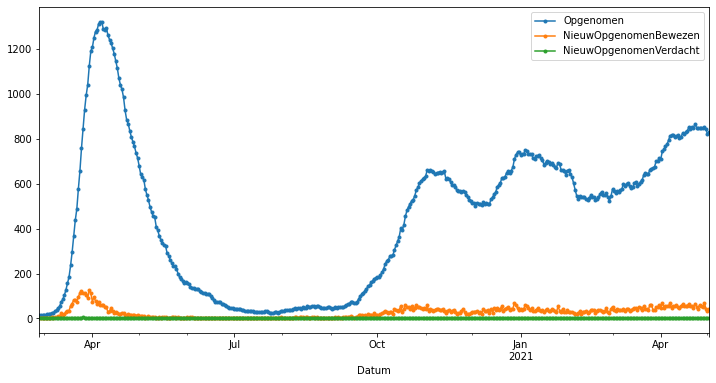

In [8]:
df.plot(
    x="Datum",
    y=["Opgenomen", "NieuwOpgenomenBewezen", "NieuwOpgenomenVerdacht"],
    figsize=(12,6),
    style=".-",
)

## Visualize intensive care usage per day

<AxesSubplot:xlabel='Datum'>

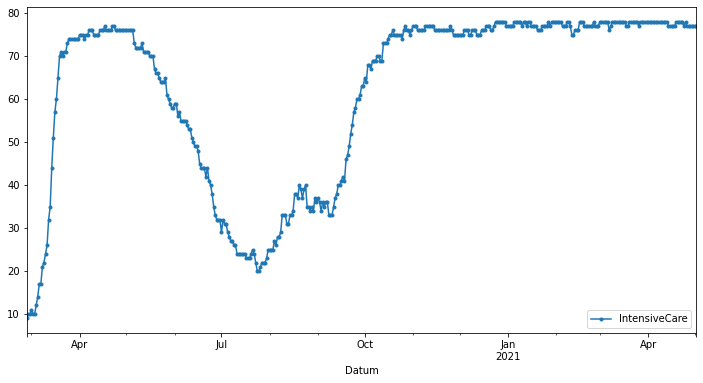

In [9]:
df.plot(
    x="Datum",
    y=["IntensiveCare"],
    figsize=(12,6),
    style=".-",
)

## Visualize cases per day

<AxesSubplot:xlabel='Datum'>

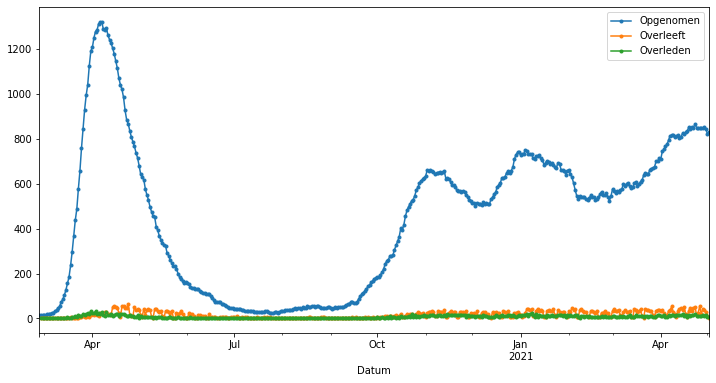

In [10]:

df.plot(
    x="Datum",
    y=["Opgenomen", "Overleeft", "Overleden"],
    figsize=(12,6),
    style=".-",
)

## Visualize cumulative per day

<AxesSubplot:xlabel='Datum'>

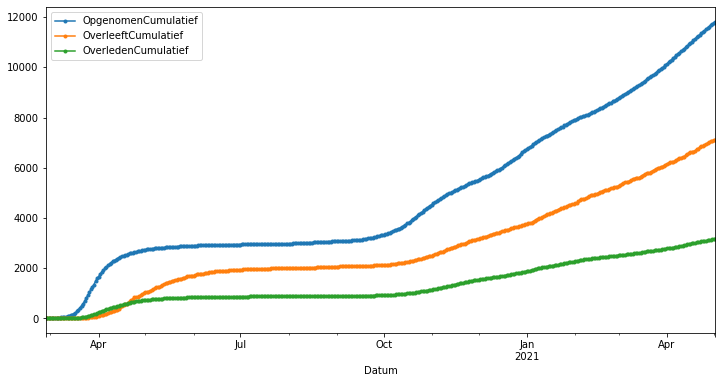

In [11]:
df.plot(
    x="Datum",
    y=["OpgenomenCumulatief", "OverleeftCumulatief", "OverledenCumulatief"],
    figsize=(12,6),
    style=".-",
)